In [394]:
import os 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns

In [395]:
plt.style.use("seaborn-pastel")

In [396]:
def read_data(file_name: str) -> pd.DataFrame:
    df = pd.read_csv("data/"+file_name, sep="\t")
    df.columns = [col.lower().replace(".", "_") for col in df.columns]
    return df

In [397]:
def nearest(df_train:pd.DataFrame, df_test:pd.DataFrame, return_dist: bool= False) -> dict:
    """Calculates for each test observation the sorted list 
    of nearest training IDs.

    Parameters
    ----------
    df_train : pd.DataFrame
        [description]
    df_test : pd.DataFrame
        [description]

    Returns
    -------
    dict
        Dictionary mapping the test ID to the sorted nearest
        training IDs.
    """
    d = {}
    euclid = {}
    for idx in df_test.index:
        test_id = df_test.loc[idx, "id"]
        row = df_test.loc[idx, ~df_test.columns.isin(["id", "class"])]
        cop = df_train.copy()
        cop["dist"] = ((cop.loc[:, ~cop.columns.isin(["id", "class"])] - row)**2).sum(axis=1)
        IDs = cop.sort_values("dist").id.values.tolist()
        d[test_id] = IDs
        euclid[test_id] = cop[["id", "dist"]]
    if return_dist:
        return d, euclid
    return d
        

In [398]:
def train_test(df_train: pd.DataFrame, df_test:pd.DataFrame, k:int) -> float:    
    x_train, y_train = df_train.loc[:, ~df_train.columns.isin(["id", "class"])], df_train["class"]
    x_test, y_test = df_test.loc[:, ~df_test.columns.isin(["id", "class"])], df_test["class"]

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)
    acc = accuracy_score(y_test, y_pred)

    return acc
    

In [399]:
def experiment(df_train: pd.DataFrame, df_test: pd.DataFrame, n_neighbors: list) -> list[dict]:
    nearest_mapper = nearest(df_train, df_test)
    accs = {}
    for k in n_neighbors:
        acc = train_test(df_train, df_test, k)
        accs[k] = acc
    
    return accs, nearest_mapper

In [400]:
def plot_2f_data(df_train: pd.DataFrame, df_test: pd.DataFrame) -> None:
    x1_name = "total_sulfur_dioxide"
    x2_name = "citric_acid"
    fig, ax = plt.subplots(figsize=(20,10))
    ax.plot(df_train[x1_name], df_train[x2_name], marker="o", ls="", markersize=23, color="red")
    ax.plot(df_test[x1_name], df_test[x2_name], marker="s", ls="", markersize=23, color="blue")
    ax.set_xlabel(x1_name, fontsize=15)
    ax.set_ylabel(x2_name, fontsize=15)

    # offset = 1.0 
    # ax.set_xlim(min(x)-offset, max(x)+ offset)
    # ax.set_ylim(min(y)-offset, max(y)+ offset)

    for text, i,j in df_train[["id", x1_name, x2_name]].values:
        ax.annotate(
            str(text),  
            xy=(i, j), 
            color='white',
            fontsize="large", 
            weight='heavy',
            horizontalalignment='center',
            verticalalignment='center'
        )

    for text, i,j in df_test[["id", x1_name, x2_name]].values:
        ax.annotate(
            str(text),  
            xy=(i, j), 
            color='white',
            fontsize="large", 
            weight='heavy',
            horizontalalignment='center',
            verticalalignment='center'
        )



In [401]:
file_names = os.listdir("data")

In [402]:
file_names

['TestingData_11F_Norm.txt',
 'TestingData_11F_Original.txt',
 'TestingData_2F_Norm.txt',
 'TestingData_2F_Original.txt',
 'TrainingData_11F_Norm.txt',
 'TrainingData_11F_Original.txt',
 'TrainingData_2F_Norm.txt',
 'TrainingData_2F_Original.txt']

In [403]:
test_2f_orig = read_data('TestingData_2F_Original.txt')
train_2f_orig = read_data('TrainingData_2F_Original.txt')
train_2f_norm = read_data('TrainingData_2F_Norm.txt')
test_2f_norm = read_data('TestingData_2F_Norm.txt')

test_11f_orig = read_data('TestingData_11F_Original.txt')
train_11f_orig = read_data('TrainingData_11F_Original.txt')
train_11f_norm = read_data('TrainingData_11F_Norm.txt')
test_11f_norm = read_data('TestingData_11F_Norm.txt')

# A)

In [404]:
Ks = [1, 3, 5, 7]
acc_2f_orig, nearest_2f_orig = experiment(train_2f_orig, test_2f_orig, Ks)
acc_2f_norm, nearest_2f_norm = experiment(train_2f_norm, test_2f_norm, Ks)

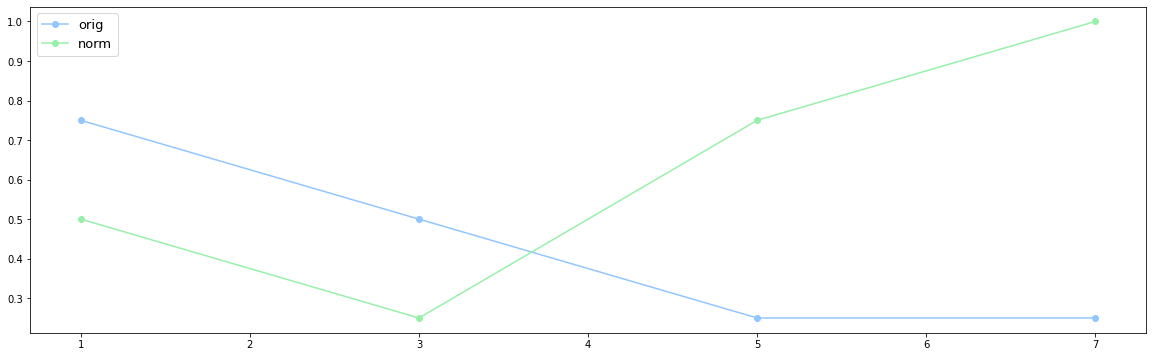

In [405]:
plot_acc = lambda acc, *args, **kwargs: plt.plot(acc.keys(), acc.values(), ls='-', marker='o', *args, **kwargs)
plt.figure(figsize=(20, 6))
plot_acc(acc_2f_orig, label="orig")
plot_acc(acc_2f_norm, label="norm")
plt.legend(fontsize=13)

# B)

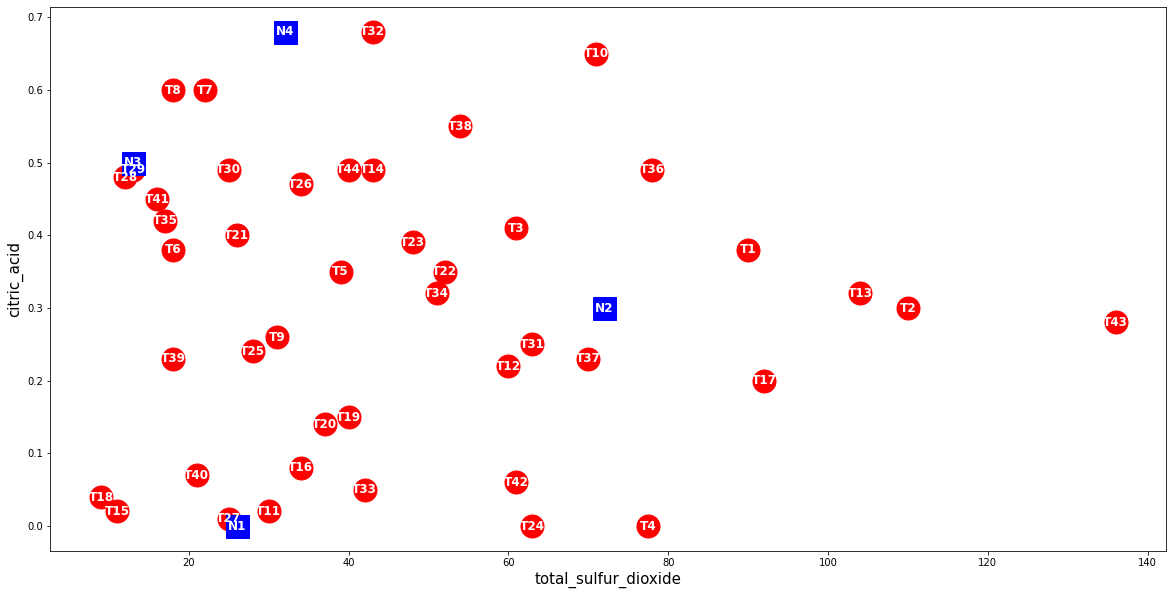

In [406]:
plot_2f_data(train_2f_orig, test_2f_orig)

In [407]:
for key, value in nearest_2f_orig.items():
    print(f"{key}: {value[:5]}")

N1: ['T21', 'T27', 'T30', 'T25', 'T11']
N2: ['T10', 'T37', 'T4', 'T36', 'T31']
N3: ['T29', 'T28', 'T15', 'T41', 'T35']
N4: ['T9', 'T26', 'T16', 'T11', 'T25']


# C)

## 1.1

In [408]:
acc_11f_norm, nearest_11f_norm = experiment(train_11f_norm, test_11f_norm, Ks)

In [409]:
for key, value in nearest_2f_norm.items():
    print(f"{key}: {value[:5]}")

N1: ['T27', 'T11', 'T40', 'T15', 'T16']
N2: ['T31', 'T37', 'T12', 'T34', 'T22']
N3: ['T29', 'T28', 'T41', 'T30', 'T35']
N4: ['T32', 'T7', 'T8', 'T38', 'T30']


In [410]:
for key, value in nearest_11f_norm.items():
    print(f"{key}: {value[:5]}")

N1: ['T16', 'T27', 'T19', 'T20', 'T15']
N2: ['T31', 'T5', 'T22', 'T19', 'T34']
N3: ['T26', 'T28', 'T7', 'T29', 'T41']
N4: ['T30', 'T1', 'T8', 'T7', 'T6']


In [411]:
x_train_2f, y_train_2f = train_2f_norm.loc[:, ~train_2f_norm.columns.isin(["id", "class"])], train_2f_norm["class"]
x_test_2f, y_test_2f = test_2f_norm.loc[:, ~test_2f_norm.columns.isin(["id", "class"])], test_2f_norm["class"]

x_train_11f, y_train_11f = train_11f_norm.loc[:, ~train_11f_norm.columns.isin(["id", "class"])], train_11f_norm["class"]
x_test_11f, y_test_11f = test_11f_norm.loc[:, ~test_11f_norm.columns.isin(["id", "class"])], test_11f_norm["class"]

In [412]:
x_test_2f.loc[3].values.reshape(1,-1)

array([[0.181, 1.   ]])

In [413]:
euc_2f_case0 = euclidean_distances(x_train_2f.values, x_test_2f.loc[3].values.reshape(1,-1))
euc_11f_case0 = euclidean_distances(x_train_11f.values, x_test_11f.loc[3].values.reshape(1,-1))

In [414]:
knn_2f = KNeighborsClassifier(5)
knn_11f = KNeighborsClassifier(5)

knn_2f.fit(x_train_2f, y_train_2f)
knn_11f.fit(x_train_11f, y_train_11f)

KNeighborsClassifier()

In [415]:
test_2f_norm["pred_case0"] = knn_2f.predict(x_test_2f)
test_11f_norm["pred_case0"] = knn_11f.predict(x_test_11f)

In [416]:
test_2f_norm

,id,total_sulfur_dioxide,citric_acid,class,pred_case0
0,N1,0.134,0.000,0,0
1,N2,0.496,0.441,0,1
2,N3,0.031,0.735,1,1
3,N4,0.181,1.000,1,1


In [417]:
test_11f_norm[["id", "class", "pred_case0"]]

,id,class,pred_case0
0,N1,0,0
1,N2,0,0
2,N3,1,1
3,N4,1,0


## 1.2 

Changing citric acid from 1.0 to 0.3

In [418]:
x_test_2f.loc[3, "citric_acid"] = 0.3
x_test_11f.loc[3, "citric_acid"] = 0.3

C:\Users\Eduardo Pacheco\AppData\Local\Temp\ipykernel_8788\4031355549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_2f.loc[3, "citric_acid"] = 0.3
C:\Users\Eduardo Pacheco\AppData\Local\Temp\ipykernel_8788\4031355549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_11f.loc[3, "citric_acid"] = 0.3


In [419]:
euc_2f_case1 = euclidean_distances(x_train_2f.values, x_test_2f.loc[3].values.reshape(1,-1))
euc_11f_case1 = euclidean_distances(x_train_11f.values, x_test_11f.loc[3].values.reshape(1,-1))

In [420]:
test_2f_norm["pred_case1"] = knn_2f.predict(x_test_2f)
test_11f_norm["pred_case1"] = knn_11f.predict(x_test_11f)

In [421]:
test_2f_norm

,id,total_sulfur_dioxide,citric_acid,class,pred_case0,pred_case1
0,N1,0.134,0.000,0,0,0
1,N2,0.496,0.441,0,1,1
2,N3,0.031,0.735,1,1,1
3,N4,0.181,1.000,1,1,0


In [422]:
test_11f_norm[["id", "class", "pred_case0", "pred_case1"]]

,id,class,pred_case0,pred_case1
0,N1,0,0,0
1,N2,0,0,0
2,N3,1,1,1
3,N4,1,0,0


## 1.3

In [423]:
x_test_2f.loc[3, "citric_acid"] = 0.85
x_test_11f.loc[3, "citric_acid"] = 0.85

C:\Users\Eduardo Pacheco\AppData\Local\Temp\ipykernel_8788\238761069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_2f.loc[3, "citric_acid"] = 0.85
C:\Users\Eduardo Pacheco\AppData\Local\Temp\ipykernel_8788\238761069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_11f.loc[3, "citric_acid"] = 0.85


In [424]:
euc_2f_case2 = euclidean_distances(x_train_2f.values, x_test_2f.loc[3].values.reshape(1,-1))
euc_11f_case2 = euclidean_distances(x_train_11f.values, x_test_11f.loc[3].values.reshape(1,-1))

In [425]:
test_2f_norm["pred_case2"] = knn_2f.predict(x_test_2f)
test_11f_norm["pred_case2"] = knn_11f.predict(x_test_11f)

In [426]:
test_2f_norm

,id,total_sulfur_dioxide,citric_acid,class,pred_case0,pred_case1,pred_case2
0,N1,0.134,0.000,0,0,0,0
1,N2,0.496,0.441,0,1,1,1
2,N3,0.031,0.735,1,1,1,1
3,N4,0.181,1.000,1,1,0,0


In [427]:
test_11f_norm[["id", "class", "pred_case0", "pred_case1", "pred_case2"]]

,id,class,pred_case0,pred_case1,pred_case2
0,N1,0,0,0,0
1,N2,0,0,0,0
2,N3,1,1,1,1
3,N4,1,0,0,0


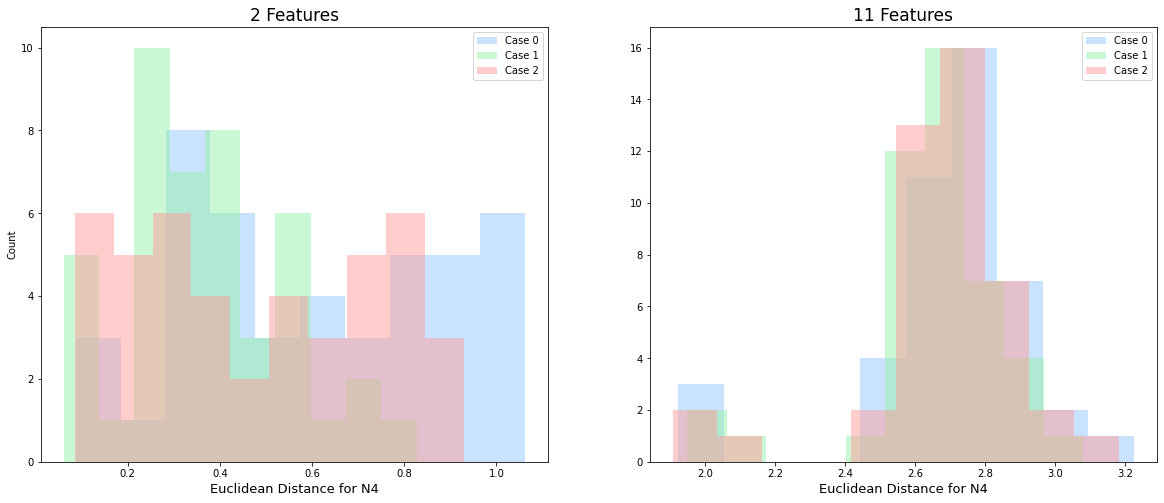

In [431]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("2 Features", fontsize=17)
plt.ylabel("Count")
plt.xlabel("Euclidean Distance for N4", fontsize=13)
for idx, dist in enumerate([euc_2f_case0, euc_2f_case1, euc_2f_case2]):
    plt.hist(dist, alpha=0.5, label=f"Case {idx}")

plt.legend()

plt.subplot(1,2,2)
plt.title("11 Features", fontsize=17)
plt.xlabel("Euclidean Distance for N4", fontsize=13)
for idx, dist in enumerate([euc_11f_case0, euc_11f_case1, euc_11f_case2]):
    plt.hist(dist, alpha=0.5, label=f"Case {idx}")

plt.legend()